In [1]:
%matplotlib inline

In [2]:
from ssf_code import *

In [3]:
sd.query_devices()

> 0 Built-in Microphone, Core Audio (2 in, 0 out)
< 1 Built-in Output, Core Audio (0 in, 2 out)
  2 Aggregate Device, Core Audio (0 in, 0 out)

* Back to [Introduction](./01_Signals_Sound_and_Filters_Intro.ipynb)

### ACT III, Chapter I
# 1.1 PHASE

I really hoped that we won't need to open that can of worms. I'll try to make it short as in "Hello, I'm Pandora and welcome to my unboxing video".

The **phase** of a (continuous)signal doesn't have a *real* physical representation. That's why an *imaginary* one is used. Well, this was a joke, but it's not funny because it's kinda the truth. Kinda.

In the real world phase doesn't contain a tangible information about the quality of a signal. In the real world all oscillations star at rest. Our human perception doesn't have an intuitive understanding of phase. In binaural audio we use phase to determine the location of the source of the sound we hear. But that's it. It shows us where on an arbitrary/imaginary timeline(axis) we did take a measurement. Our ears being displaced in space cannot take a simultaneous "measurement" of a wave that comes at an angle $\ne$90° to our nose.

But in mathematics, physics and engineering, boy do they need phase... In the context of this project, we need to know about phase because of the **Fourier representation** of the signal. *The Fourier Transform* breaks up a signal into its frequency components. For each frequency $\nu\in\mathbb{R}$ the Fourier transform yields a magnitude coefficient $d_\nu$ and **phase coefficient $\varphi_\nu$**. That phase coef. tells us to which extent the given signal matches a sinusoidal prototype oscillation of that frequency.

One very important property of the Fourier transform is that the original signal can be reconstructed from these coefficients. One *simply* superimposes the sinusoids of all possible frequencies, each weighted by the magnitude coefficient and *shifted by the phase* coefficient. That weighted superposition is called the **Fourier representation** of a signal. **The original signal and its Fourier transform contain the same amount of information.** This information, however, is represented in different ways. While the signal displays the information across time, the Fourier transform displays the information across frequency.

If we omit the phase in the math model of a signal, we will lose crucial information and the ability to reverse the process. The next paragraph will take a bit closer look at the role of the Phase. A paragraph that will lead to *computing similarity with Integrals*. A paragraph that sheds light at another facet of the Signal. But non the less a paragraph that can be, well, glossed over.

# 1.2 THE ROLE OF THE PHASE 

We'll start with going back to a spin on the formula from Act I, Chapter 3.1
$$ g(t) = A \sin = A \sin(2\pi \nu t + \varphi )$$ for $t \in \mathbb{R}$.
$A$ is the **amplitude**, $\nu$ is the **frequency** in Hz,  and $\varphi$ is the **phase** in *normalized radians*. In Fourier analysis, we consider prototype oscillations that are normalized with regard to their power(average energy) by setting $A=\sqrt{2}$. Thus for each frequency parameter $\nu$ and phase parameter $\varphi$ we obtain a sinusoid $\cos_{\nu,\varphi}:\mathbb{R}\rightarrow\mathbb{R}$ given by $$\cos_{\nu,\varphi}(t):=\sqrt{2}\cos(2\pi(\nu t - \varphi))$$ for $t\in\mathbb{R}$. Since cosine function is periodic, the parameters $\varphi$ and $\varphi + k$ for integers $k\in\mathbb{Z}$ yield the same function. Therefore, the phase parameter needs to be considered for $\varphi\in[0,1)$.

When measuring how well a given signal coincides with a sinusoid of frequency $\varphi$, we have the freedom of shifting the sinusoid in time. This degree of freedom is expressed by the phase parameter $\varphi$. The degree of similarity between the input signal and the sinusoid of fixed frequency crucially depends on the phase of the later. And when we compare the input signal with a sinusoid $\cos_{\nu\varphi}$ of frequency $\nu$, we have implicitly used the phase $\varphi$ that yields the maximal possible similarity. To understand this better, one needs to understands how we actually compare the signal and a sinusoid or, more generally, how we compare two given functions. Hint: we use **integrals**. And that's where I'll stop.

I promised a cool experiment, and there it goes.

### ACT III, Chapter II
# 2.1 WHAT DOES THE PHASE SOUND LIKE?

We'll start by constructing a new wave (signal) with known frequencies.

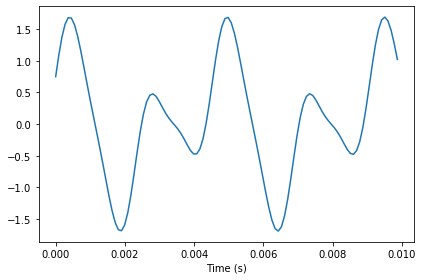

In [4]:
signal_1 = SinSignal(440, 1)
signal_2 = SinSignal(880, .2)
signal_3 = CosSignal(220, 0.75)
signal = signal_1 + signal_2 + signal_3
wave = signal.make_wave(duration=1, framerate=11050)
segment = wave.segment(duration=0.01)
segment.plot()
decorate(xlabel='Time (s)')

Play it.

In [5]:
wave.make_audio()

Extract the wave array and compute the real FFT (which is just an FFT optimized for real inputs).

In [6]:
hs = np.fft.rfft(wave.ys)
hs

array([ 2.26134129e-12+0.00000000e+00j, -5.01369071e-13+1.50773178e-12j,
       -2.95195982e-13-1.41298434e-12j, ...,
        2.93754629e-12+8.97095502e-13j, -3.80830466e-13+7.21667642e-12j,
       -7.82169208e-12+0.00000000e+00j])

Compute the frequencies that match up with the elements of the FFT.

In [7]:
n = len(wave.ys)                 # number of samples
d = 1 / wave.framerate           # time between samples
fs = np.fft.rfftfreq(n, d)
fs

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 5.523e+03, 5.524e+03,
       5.525e+03])

Plot the magnitudes vs the frequencies. We should get a plot showing the frequencies(and amplitudes) we've put into our wave.

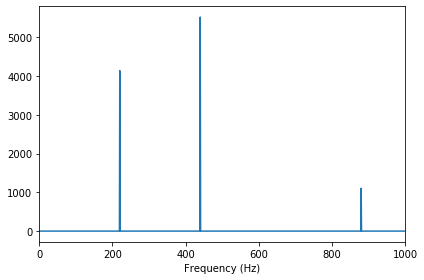

In [8]:
magnitude = np.absolute(hs)
plt.plot(fs, magnitude)
decorate(xlabel='Frequency (Hz)', xlim=(0,1000))

Plot the phases vs the frequencies.

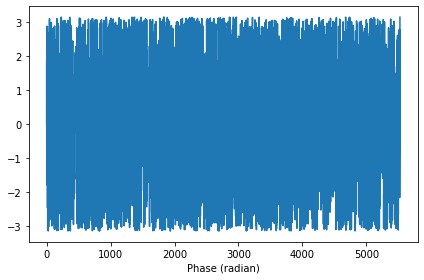

In [9]:
angle = np.angle(hs)
plt.plot(fs, angle)
decorate(xlabel='Phase (radian)')

# NOW WE SHUFFLE THE PHASES OF OUR WAVE

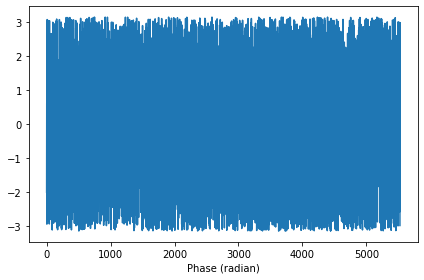

In [10]:
random.shuffle(angle)
plt.plot(fs, angle)
decorate(xlabel='Phase (radian)')

Put the shuffled phases back into the spectrum.  Each element in `hs` is a complex number with magitude $A$ and phase $\phi$, with which we can compute $A e^{i \phi}$

In [11]:
i = complex(0, 1)
spectrum = wave.make_spectrum()
spectrum.hs = magnitude * np.exp(i * angle)

Convert the spectrum back to a wave (which uses irfft).

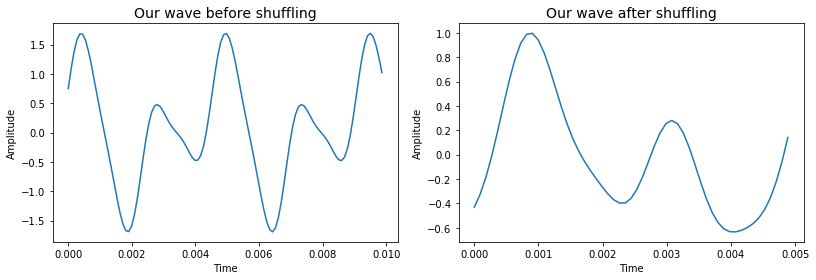

In [12]:
wave2 = spectrum.make_wave()
wave2.normalize()
segment2 = wave2.segment(duration=0.005)

fig = plt.figure(figsize=(17, 4))
ax1 = fig.add_subplot(1, 3, 1)
segment.plot()
plt.title(f'Our wave before shuffling', fontsize=14)
ax2 = fig.add_subplot(1, 3, 2)
segment2.plot()
plt.title(f'Our wave after shuffling', fontsize=14)
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax2.set_xlabel('Time')
ax2.set_ylabel('Amplitude')

    
plt.tight_layout()

Play the wave with the shuffled phases.

In [13]:
wave2.make_audio()

For comparison, here's the original wave again.

In [14]:
wave.make_audio()

Although the two signals have different waveforms, they have the same frequency components with the same amplitudes.  They differ only in phase.